# Email Classification Project ---- Spam/Ham

In [1]:

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd 

In [2]:
# reading data from text file 
with open('SMSSpamCollection.txt','r') as file: 
    data = file.read()

In [3]:
temp = data.split('\n')

In [4]:
print("No. of emails : ",len(temp) )

No. of emails :  5575


In [5]:
x = [] 
y = [] 
for email_with_label in temp: 
    temp_emails = email_with_label.split('\t') 
    if len(temp_emails) == 2 : 
        x.append(temp_emails[1])
        y.append(temp_emails[0])
        
    

In [6]:
len(x),len(y)

(5574, 5574)

In [7]:
# dataframe
dt = {'email_message':x,"label":y}
email_data = pd.DataFrame(dt)
email_data.head()

,email_message,label
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham


In [8]:
# df2 = pd.read_table('SMSSpamCollection.txt',header=None)
# df2.columns = ['label','email_message']

In [9]:
# df2.head()

In [10]:
# problem statment is reg or classifcication 
# ans is classification 
# we need to clasify the ham and spam

# is the data is blancnce or imbalacne

email_data['label'].value_counts()

label
ham     4827
spam     747
Name: count, dtype: int64

In [11]:
# 80% are ham
# 20% are spam
# now this is imbalanced ratio
# we need to bring it to 60 - 50 then we can say it is trained well


# how to do that, we can add the sapm email to equal the ham, incr or decr to make it balanced
# now we r going to remove the ham email to equle the spam.

In [12]:
ham = email_data[email_data["label"]== "ham"]
spam = email_data[email_data["label"]== "spam"]

In [13]:
ham.sample(1000) #selects random records 1000

,email_message,label
3257,Who were those people ? Were you in a tour ? I...,ham
2022,"I don't have anybody's number, I still haven't...",ham
4742,Many more happy returns of the day. I wish you...,ham
3648,"Hey babe, my friend had to cancel, still up fo...",ham
3016,&lt;#&gt; mins but i had to stop somewhere f...,ham
...,...,...
1293,Da my birthdate in certificate is in april but...,ham
1363,What does the dance river do?,ham
2279,Hmm...Bad news...Hype park plaza $700 studio t...,ham
862,Your brother is a genius,ham


In [14]:
ham = ham.sample(1000)

In [15]:
spam.shape, ham.shape

((747, 2), (1000, 2))

In [16]:
# going to combine both
final_df=pd.concat([ham,spam],axis=0)
# 0 means row in here axis, i dont want in col wise, i want it row thats y
final_df.head()

,email_message,label
3000,"Oh, then your phone phoned me but it disconnected",ham
1184,Am i that much bad to avoid like this?,ham
1459,"Fighting with the world is easy, u either win ...",ham
5427,Otherwise had part time job na-tuition..,ham
243,"Okay. No no, just shining on. That was meant t...",ham


In [17]:
missing_values = final_df.isnull().sum()
missing_values
# to cross verify is there any missing value are not 

email_message    0
label            0
dtype: int64

In [18]:
final_df.shape

(1747, 2)

In [19]:
# Text cleaning 
# final_df.head()
# now we are gonna convert it in the form of 0 and 1
# before that we need to clean the 
import re # regular expression 

In [20]:
final_df['email_message'][2]


"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

In [21]:
# the indexing is being updated, coz we have combined it
# index reassigning 
final_df.reset_index(drop = True, inplace = True ) #drop will reomove the old

In [22]:
final_df['email_message'][25]


'Ok.ok ok..then..whats ur todays plan'

In [23]:
# a-z, A-Z values will be conisidering in the email_messages in oreder to ignore the &,!,@ etc stuff
re.sub('[^a-zA-Z ]','',final_df['email_message'][25]).lower() #^ means not 


'okok okthenwhats ur todays plan'

In [24]:
# to final df and apply this operation on all the email
# final_df['cleaned_email_message'] = final_df['email_message'].apply(lambda x: re.sub('[^a-zA-Z ]', '', x).lower())
# final_df.head()


for i in range(len(final_df)):
    final_df['email_message'][i] =  re.sub('[^a-zA-Z ]', '',final_df['email_message'][i]).lower()
    final_df.head()


C:\Users\ASUS ROG\AppData\Local\Temp\ipykernel_14348\374652516.py:7: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  final_df['email_message'][i] =  re.sub('[^a-zA-Z ]', '',final_df['email_message'][i]).lower()


In [25]:
final_df['email_message'][392]


'k im ready  ltgt '

In [26]:
# labels = (final_df["label"])
labels = list(final_df['label'])
temp_labels = [1 if item == "spam" else 0 for item in labels]
final_df["label"]=temp_labels
# labels.head()

In [27]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer



In [28]:
# arr = np.random.randint(1,999,250)
arr = list(np.random.randint(1,999,250))
arr 

[643,
 317,
 208,
 498,
 918,
 823,
 315,
 262,
 426,
 782,
 342,
 368,
 228,
 560,
 53,
 458,
 793,
 423,
 822,
 468,
 735,
 978,
 445,
 374,
 699,
 414,
 569,
 674,
 15,
 71,
 76,
 562,
 919,
 929,
 451,
 33,
 762,
 264,
 264,
 483,
 867,
 467,
 474,
 599,
 181,
 848,
 556,
 207,
 647,
 206,
 611,
 367,
 365,
 622,
 609,
 961,
 11,
 444,
 16,
 129,
 244,
 586,
 831,
 796,
 10,
 275,
 995,
 601,
 819,
 221,
 938,
 587,
 722,
 771,
 217,
 143,
 806,
 412,
 69,
 830,
 628,
 852,
 938,
 238,
 398,
 952,
 810,
 297,
 311,
 486,
 52,
 4,
 807,
 238,
 59,
 484,
 365,
 770,
 372,
 4,
 15,
 876,
 136,
 907,
 644,
 442,
 133,
 806,
 602,
 358,
 307,
 666,
 752,
 857,
 893,
 153,
 932,
 818,
 292,
 911,
 644,
 20,
 263,
 369,
 15,
 954,
 68,
 614,
 637,
 104,
 49,
 216,
 587,
 235,
 238,
 697,
 196,
 821,
 160,
 167,
 595,
 90,
 119,
 844,
 16,
 869,
 479,
 75,
 578,
 120,
 144,
 302,
 42,
 394,
 945,
 415,
 86,
 641,
 789,
 620,
 293,
 442,
 117,
 899,
 718,
 165,
 331,
 321,
 27,
 966,
 940,


In [29]:
# if even  == 1, odd == 0 using list comprehension  make it quize 
even_odd_labels = [1 if x % 2 == 0 else 0 for x in arr]
print(even_odd_labels)
# done

[0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0]


In [30]:
# temp_label = []
# for i in labels:
#     if i == 'spam':
#        temp_label.append(0)
#     else:
#        temp_label.append(1)
final_df.head()


,email_message,label
0,oh then your phone phoned me but it disconnected,0
1,am i that much bad to avoid like this,0
2,fighting with the world is easy u either win o...,0
3,otherwise had part time job natuition,0
4,okay no no just shining on that was meant to b...,0


In [31]:
lst = [2,4,6,8,9,6,4]
sq =[]
for item in lst:
    sq.append(item ** 2)
print(sq)

[4, 16, 36, 64, 81, 36, 16]


In [32]:
[ item ** 2 for item in lst]

[4, 16, 36, 64, 81, 36, 16]

In [33]:
labels = [1 if item == "spam" else 0 for item in labels]
# this is list comprehension

# changed

In [34]:
x = final_df['email_message']
y = final_df['label']

In [35]:
# type(x)
x=x.values

In [36]:
bow_obj = CountVectorizer(max_features=1500, stop_words='english')
# stopwords 


In [37]:
X = bow_obj.fit_transform(x)
X 
# X.toarray()
# Q) 1747x1500, x has an arr (1747x1500 --shape) 

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 12758 stored elements and shape (1747, 1500)>

In [38]:
X=X.toarray()
# sparse and dense matrix imp queation.

In [39]:
# CountVectorizer how it changed into numerical
# recording of 20/6 not done

In [40]:
X.shape, y.shape # 1747 should be same imp

((1747, 1500), (1747,))

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size=0.15)

In [43]:
x_train.shape

(1484, 1500)

In [44]:
# Algorihms to perform classification task
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [45]:
bnb = BernoulliNB()
Gnb = GaussianNB()
mnb = MultinomialNB()

In [46]:
#Training Algorithms
bnb.fit(x_train, y_train)
print("BernoulliNB Trained")
mnb.fit(x_train, y_train)
print("GaussianNB Trained")
Gnb.fit(x_train, y_train)
print("MultinomialNB Trained")
print("Algorithms training")

BernoulliNB Trained
GaussianNB Trained
MultinomialNB Trained
Algorithms training


In [47]:
print("MultinomialNB score", mnb.score(x_train,y_train))
print("MultinomialNB score", mnb.score(x_test,y_test))

print()

print("BernoulliNB score", bnb.score(x_train,y_train))
print("BernoulliNB score", bnb.score(x_test,y_test))

print()
print("GaussianNB score", Gnb.score(x_train,y_train))
print("GaussianNB score", Gnb.score(x_test,y_test))

MultinomialNB score 0.9663072776280324
MultinomialNB score 0.9467680608365019

BernoulliNB score 0.9609164420485176
BernoulliNB score 0.9315589353612167

GaussianNB score 0.9824797843665768
GaussianNB score 0.9163498098859315


In [48]:
#Prediction

In [49]:
x_test.shape

(263, 1500)

In [50]:
prediction = mnb.predict(x_test)

In [51]:
prediction

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1],
      dtype=int64)

In [52]:
pred  =list(prediction)
actual = list(y_test)

comparison_df = pd.DataFrame({"Actual":actual,'Prediction':pred})
comparison_df.head(40)

,Actual,Prediction
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,1,1
6,0,0
7,0,0
8,0,0
9,1,1


In [53]:
from sklearn.metrics import confusion_matrix, classification_report

In [54]:
matrix = confusion_matrix(comparison_df['Actual'], comparison_df['Prediction'])
matrix

array([[139,   6],
       [  8, 110]], dtype=int64)

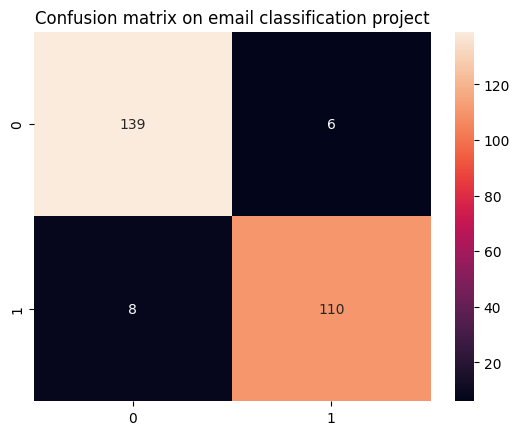

In [55]:
sns.heatmap(matrix, annot=True, fmt='d')
plt.title('Confusion matrix on email classification project')
plt.show()

In [56]:
print(classification_report(comparison_df['Actual'], comparison_df['Prediction']))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       145
           1       0.95      0.93      0.94       118

    accuracy                           0.95       263
   macro avg       0.95      0.95      0.95       263
weighted avg       0.95      0.95      0.95       263



In [57]:
# saving the models:-

In [58]:
import os,joblib

In [59]:
os.makedirs('models', exist_ok=True)

In [60]:
joblib.dump(bnb,"./models/bernouliNB,lb")
joblib.dump(Gnb,"./models/gaussianNB,lb")
joblib.dump(mnb,"./models/multinomialNB,lb")

['./models/multinomialNB,lb']

In [61]:
joblib.dump(bow_obj,'./models/bag_of_words.lb')

['./models/bag_of_words.lb']